# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+25, int(height), fontsize=10, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+25,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=10, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
182176               2020-07-17           2020-07-09            2020-06-28   
182177               2020-07-17           2020-07-10            2020-06-29   
182178               2020-07-17           2020-07-10            2020-06-29   
182179               2020-07-17           2020-07-10            2020-06-29   
182180               2020-07-17           2020-05-30            2020-05-19   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
182176             2020-06-25 00:00:00                   NaT   
182177             2020-06-26 00:00:00                   NaT   
182178             2020-06-26 00:00:00                   NaT   
182179             2020-06-25 00:00:00                   NaT   
182180             2020-05-15 00:00:00                   NaT   

           Fecha de defunción   Ciudad de ubicación     Departamento  \
Id de caso                                                             
1                         NaT           Bogotá d.c.      Bogotá D.C.   
2                         NaT   Guadalajara de buga  Valle del Cauca   
3                         NaT              Medellín        Antioquia   
4                         NaT              Medellín        Antioquia   
5                         NaT              Medellín        Antioquia   
...                       ...                   ...              ...   
182176                    NaT             Sincelejo            Sucre   
182177                    NaT             Sincelejo            Sucre   
182178                    NaT             Sincelejo            Sucre   
182179                    NaT              Medellín        Antioquia   
182180                    NaT  San andrés de tumaco           Nariño   

           Severidad      Estado  ... Clasificación de edad Sexo  \
Id de caso                        ...                              
1               Leve  Recuperado  ...               10 - 20    F   
2               Leve  Recuperado  ...               30 - 40    M   
3               Leve  Recuperado  ...               40 - 50    F   
4               Leve  Recuperado  ...               50 - 60    M   
5               Leve  Recuperado  ...               20 - 30    M   
...              ...         ...  ...                   ...  ...   
182176          Leve        Casa  ...               60 - 70    M   
182177          Leve        Casa  ...                0 - 10    M   
182178          Leve        Casa  ...               40 - 50    F   
182179          Leve        Casa  ...               20 - 30    M   
182180          Leve        Casa  ...               30 - 40    M   

           Pertenecia Étnica Nombre Grupo Étnico         Tipo  \
Id de caso                                                      
1                       Otro                 NaN    Importado   
2                       Otro                 NaN    Importado   
3                       Otro                 NaN    Importado   
4               

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                      F        M
Departamento                                                        
Amazonas                                             1026.0   1419.0
Antioquia                                            5580.0   7755.0
Arauca                                                 31.0    130.0
Archipiélago de San Andrés Providencia y Santa ...      8.0     21.0
Atlántico                                            8220.0   9563.0
Barranquilla D.E.                                   10587.0  12636.0
Bogotá D.C.                                         29239.0  29678.0
Bolívar                                               709.0    921.0
Boyacá                                                300.0    308.0
Buenaventura D.E.                                     680.0   1153.0
Caldas                                                191.0    151.0
Caquetá                                                80.0    102.0
Cartagena D.T. y C.                                  5587.0   6955.0
Casanare                                               51.0     93.0
Cauca                                                 435.0    570.0
Cesar                                                 847.0    972.0
Chocó                                                1092.0   1340.0
Cundinamarca                                         2634.0   2724.0
Córdoba                                              1070.0   1105.0
Guainía                                                 6.0      8.0
Guaviare                                                7.0     41.0
Huila                                                 248.0    244.0
La Guajira                                            615.0    686.0
Magdalena                                             662.0    727.0
Meta                                                  402.0   1423.0
Nariño                                               2329.0   2767.0
Norte de Santander                                    332.0    415.0
Putumayo                                               67.0     88.0
Quindío                                               115.0     93.0
Risaralda                                             488.0    438.0
Santa Marta D.T. y C.                                1082.0   1141.0
Santander                                             682.0   1101.0
Sucre                                                1609.0   1839.0
Tolima                                                519.0   1182.0
Valle del Cauca                                      6774.0   7985.0
Vaupés                                                 27.0     34.0
Vichada                                                 0.0      1.0

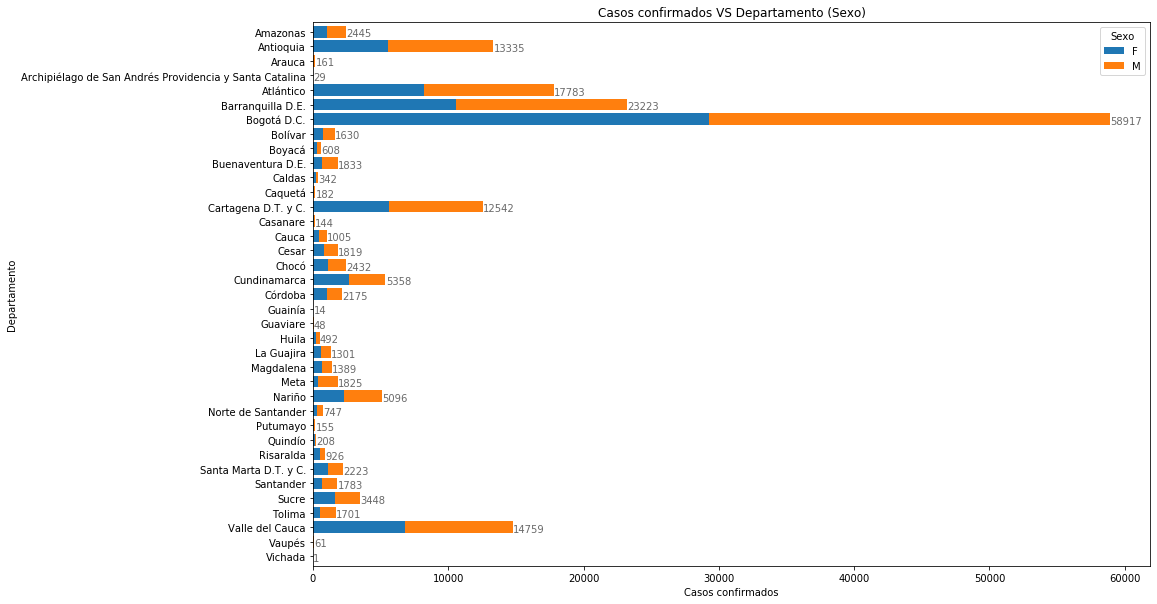

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               126      442      501   
Antioquia                                              486     1006     3609   
Arauca                                                   5       33       65   
Archipiélago de San Andrés Providencia y Santa ...       0        1        8   
Atlántico                                              737     1266     3948   
Barranquilla D.E.                                      835     1400     5130   
Bogotá D.C.                                           2782     4721    13553   
Bolívar                                                 78      153      361   
Boyacá                                                  35       56      120   
Buenaventura D.E.                                       35      247      428   
Caldas                                                  12       22       69   
Caquetá                                                  6       12       57   
Cartagena D.T. y C.                                    506      856     2877   
Casanare                                                 7        7       41   
Cauca                                                   52       93      226   
Cesar                                                  158      201      412   
Chocó                                                  101      209      575   
Cundinamarca                                           272      397     1233   
Córdoba                                                 85      114      420   
Guainía                                                  0        2        4   
Guaviare                                                 0       18       10   
Huila                                                   30       48       94   
La Guajira                                              67      137      303   
Magdalena                                               79      104      244   
Meta                                                    27      131      601   
Nariño                                                 260      472     1197   
Norte de Santander                                      34       30      182   
Putumayo                                                 2       14       37   
Quindío                                                  8       14       31   
Risaralda                                               62       90      202   
Santa Marta D.T. y C.                                  101      163      483   
Santander                                               61      165      462   
Sucre                                                  135      279      747   
Tolima                                                  62      105      569   
Valle del Cauca                                        524     1064     3367   
Vaupés                                                   4        5       19   
Vichada                                                  0        1        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                472      330      265   
Antioquia                                              3407     2026     1514   
Arauca                                                   39       10        5   
Archipiélago de San Andrés Providencia y Santa ...        9        6        3   
Atlántico                                              4205     2817     2317   
Barranquilla D.E.                                      5509     3614     3118   
Bogotá D.C.                                           12704     9404     7917   
Bolívar                                                 394      237      148   
Boyacá                                                  112       99 

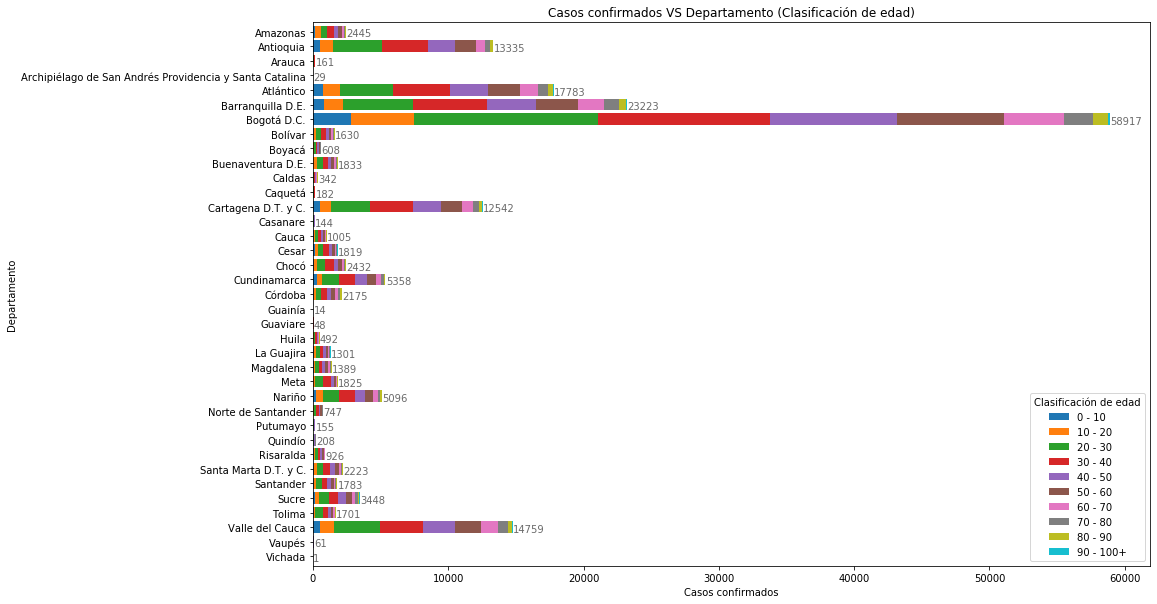

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                               80.0      101.0   
Antioquia                                            8742.0      166.0   
Arauca                                                 79.0        0.0   
Archipiélago de San Andrés Providencia y Santa ...      5.0        0.0   
Atlántico                                            7177.0      858.0   
Barranquilla D.E.                                    9523.0     1249.0   
Bogotá D.C.                                         31937.0     1402.0   
Bolívar                                               649.0       81.0   
Boyacá                                                225.0       17.0   
Buenaventura D.E.                                     362.0      123.0   
Caldas                                                 73.0        7.0   
Caquetá                                               121.0        4.0   
Cartagena D.T. y C.                                  4159.0      414.0   
Casanare                                               75.0        1.0   
Cauca                                                 550.0       33.0   
Cesar                                                 655.0       38.0   
Chocó                                                 846.0       80.0   
Cundinamarca                                         2467.0      116.0   
Córdoba                                               988.0      256.0   
Guainía                                                 0.0        1.0   
Guaviare                                                9.0        0.0   
Huila                                                 118.0       15.0   
La Guajira                                            808.0       72.0   
Magdalena                                             480.0      142.0   
Meta                                                  602.0       20.0   
Nariño                                               1621.0      160.0   
Norte de Santander                                    396.0       35.0   
Putumayo                                               92.0       11.0   
Quindío                                                46.0        5.0   
Risaralda                                             393.0       21.0   
Santa Marta D.T. y C.                                1230.0       85.0   
Santander                                             999.0       34.0   
Sucre                                                1898.0      198.0   
Tolima                                                926.0       30.0   
Valle del Cauca                                      5903.0      512.0   
Vaupés                                                 34.0        1.0   
Vichada                                                 0.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                10.0           7.0   
Antioquia                                              680.0          83.0   
Arauca                                                   5.0           1.0   
Archipiélago de San Andrés Providencia y Santa ...       0.0           0.0   
Atlántico                                              640.0          93.0   
Barranquilla D.E.                                      910.0         115.0   
Bogotá D.C.                                           3275.0         162.0   
Bolívar                                                 89.0           9.0   
Boyacá                                                  47.0           3.0   
Buenaventura D.E.                                      115.0          17.0   
Caldas                                                  17.0           3.0   
Caquetá                                                 22.0           2.0   
Cartagena D.T. y C.  

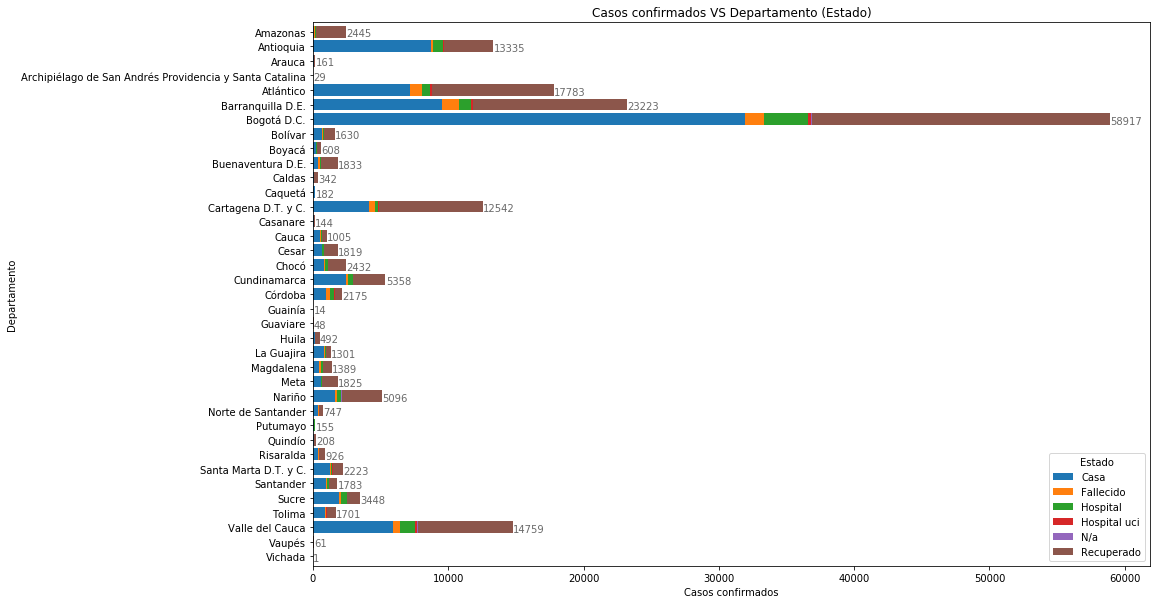

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo              F      M
Estado                    
Casa          39923  44345
Fallecido      2357   3931
Hospital       4038   5492
Hospital uci    371    666
N/a             161    219
Recuperado    37481  43156

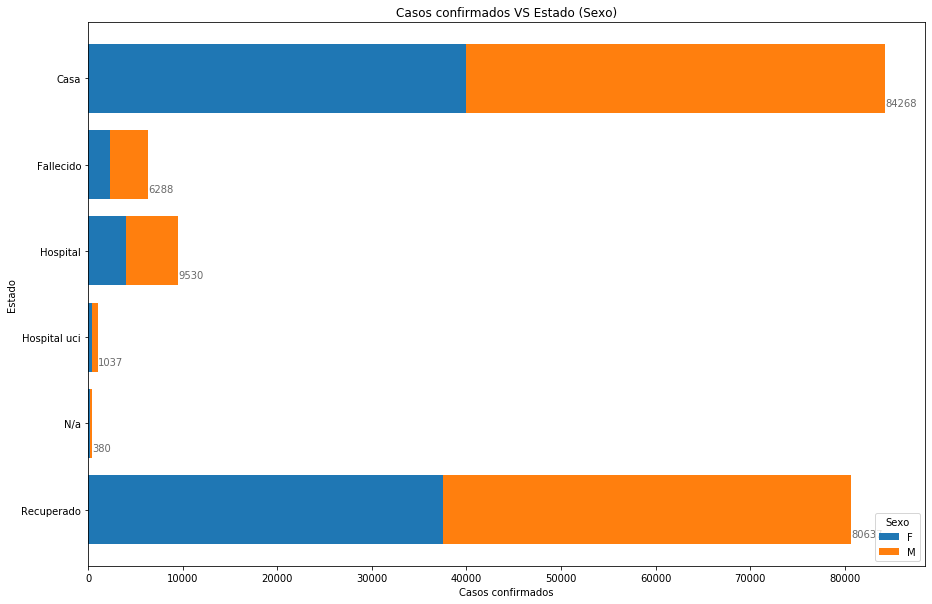

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     3519     6537    21350    20825    13528    10340   
Fallecido                  12       13       90      228      513      974   
Hospital                  361      218      796     1236     1473     1949   
Hospital uci               49       25       43      115      151      236   
N/a                        11        8       14       18       24       45   
Recuperado               3822     7277    19892    19176    12599     9624   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      5094     2103      828        144  
Fallecido                 1476     1559     1154        269  
Hospital                  1702     1149      569         77  
Hospital uci               227      139       47          5  
N/a                         83       85       72         20  
Recuperado                4942     2284      886        135

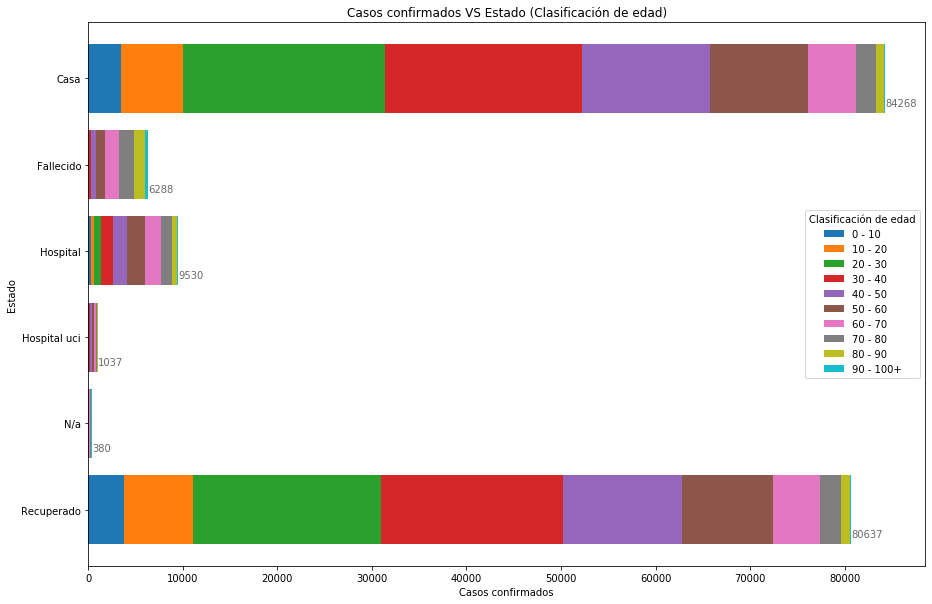

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo             F      M
Tipo                     
En estudio   78443  85645
Importado      450    515
Relacionado   5438  11649

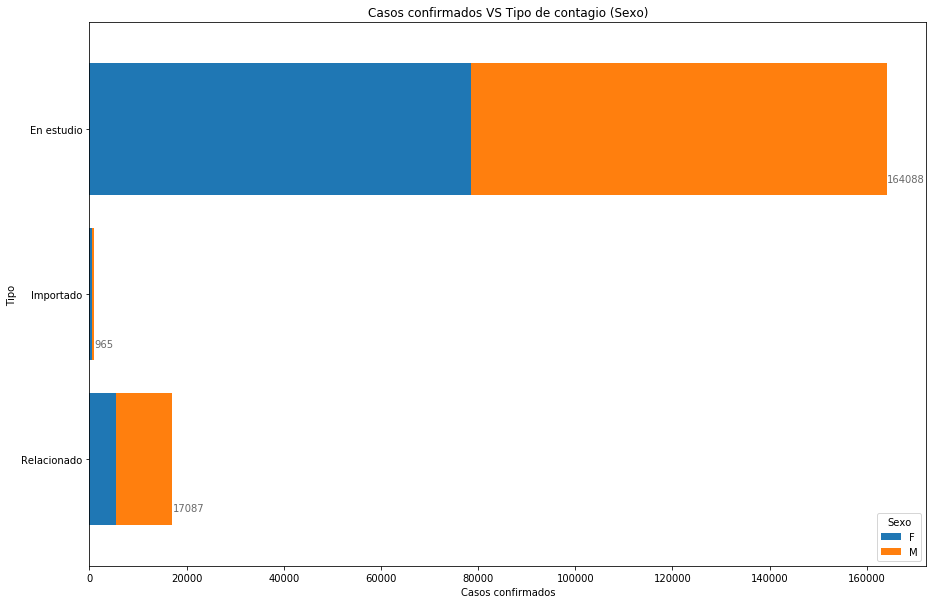

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio               6951    11741    37109    37299    25964    21478   
Importado                   5       35      239      226      171      149   
Relacionado               818     2302     4837     4073     2153     1541   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               12659     6914     3365        608  
Importado                   95       35        9          1  
Relacionado                770      370      182         41

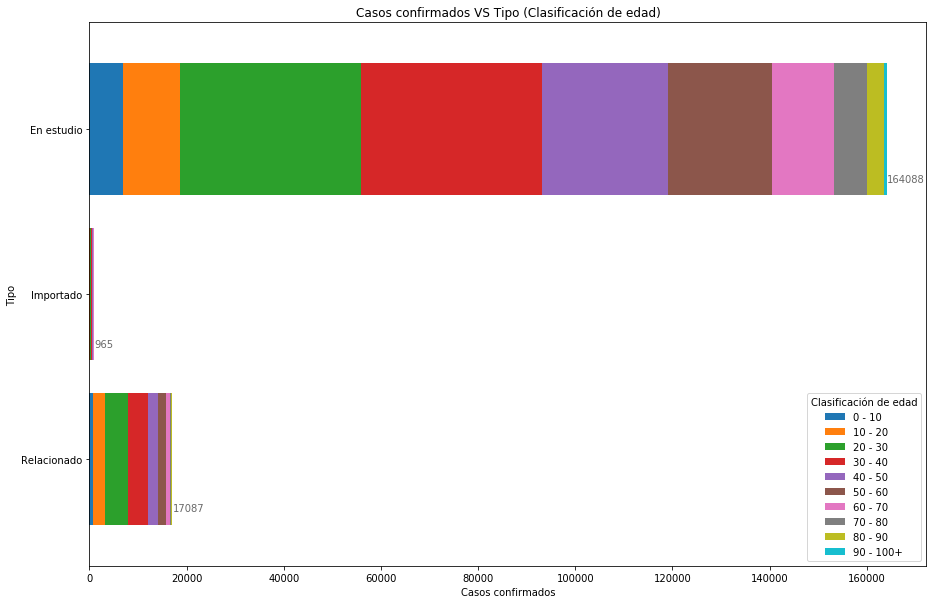

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  3913   3861
10 - 20                 6400   7678
20 - 30                19678  22507
30 - 40                18896  22702
40 - 50                13120  15168
50 - 60                10685  12483
60 - 70                 6203   7321
70 - 80                 3300   4019
80 - 90                 1762   1794
90 - 100+                374    276

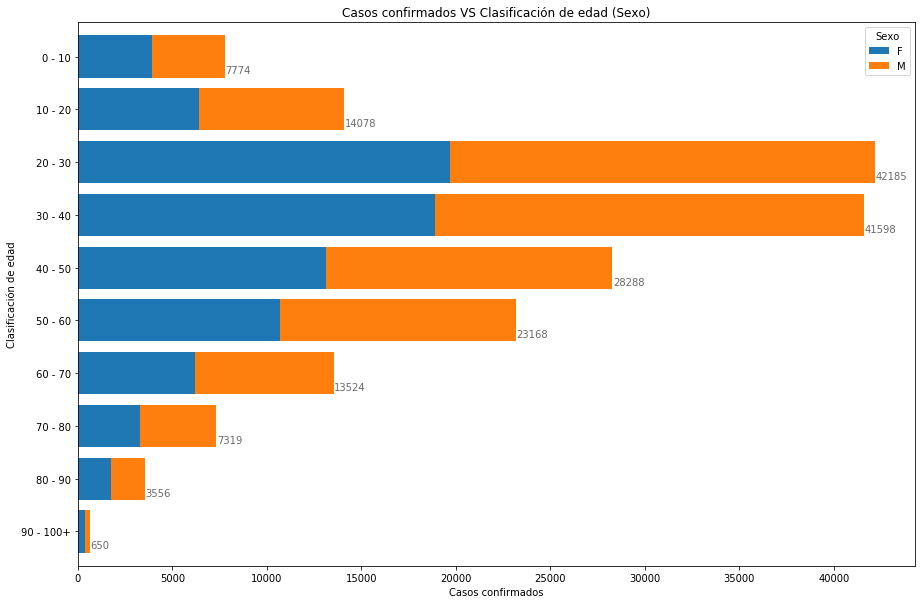

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  3519         12       361            49   11   
10 - 20                 6537         13       218            25    8   
20 - 30                21350         90       796            43   14   
30 - 40                20825        228      1236           115   18   
40 - 50                13528        513      1473           151   24   
50 - 60                10340        974      1949           236   45   
60 - 70                 5094       1476      1702           227   83   
70 - 80                 2103       1559      1149           139   85   
80 - 90                  828       1154       569            47   72   
90 - 100+                144        269        77             5   20   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       3822  
10 - 20                      7277  
20 - 30                     19892  
30 - 40                     19176  
40 - 50                     12599  
50 - 60                      9624  
60 - 70                      4942  
70 - 80                      2284  
80 - 90                       886  
90 - 100+                     135

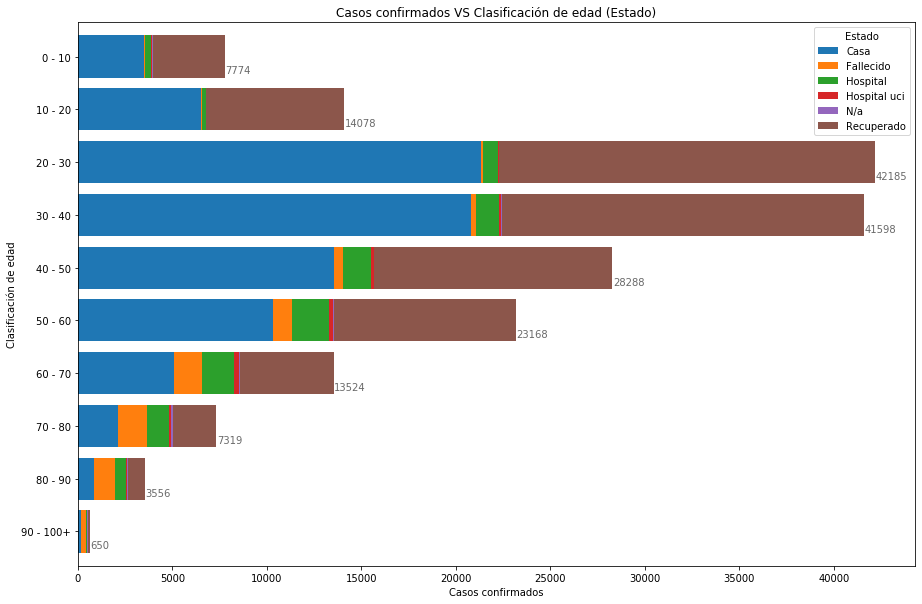

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-07-13            2936.0  3292.0
2020-07-14            2952.0  3477.0
2020-07-15            2378.0  2630.0
2020-07-16            2581.0  2641.0
2020-07-17             130.0   158.0

[131 rows x 2 columns]

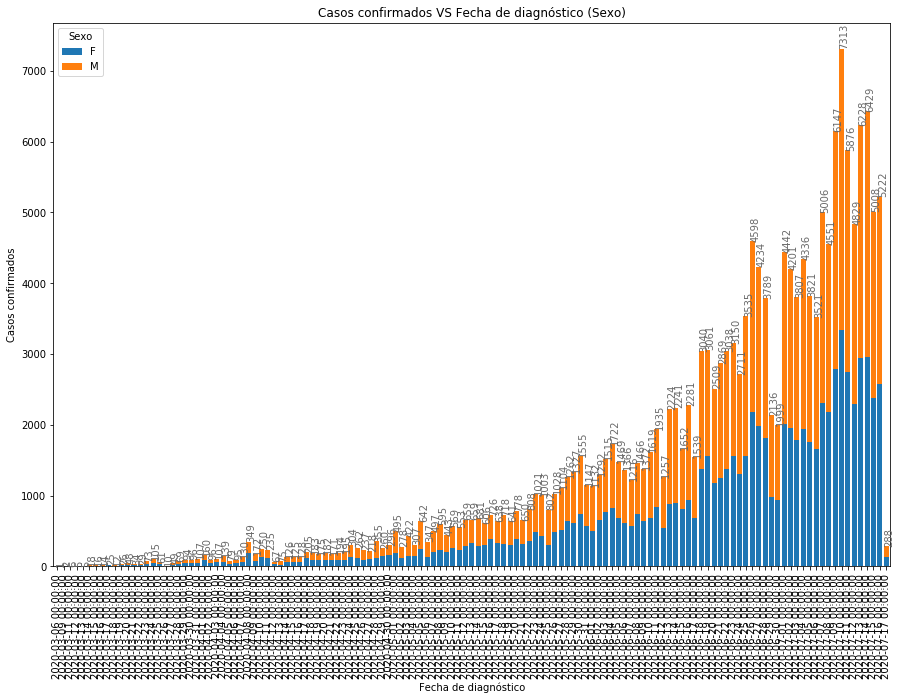

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-07-13                209      403     1461     1438     1002      839   
2020-07-14                235      477     1513     1477     1052      810   
2020-07-15                191      373     1128     1115      798      674   
2020-07-16                237      353     1195     1193      849      732   
2020-07-17                  9       12       70       70       41       32   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-07-13                 495      245      115         21  
2020-07-14                 448      243      150         24  
2020-07-15                 388      229       97         15  
2020-07-16                 377      192       87          7  
2020-07-17                  30       14       10          0  

[131 rows x 10 columns]

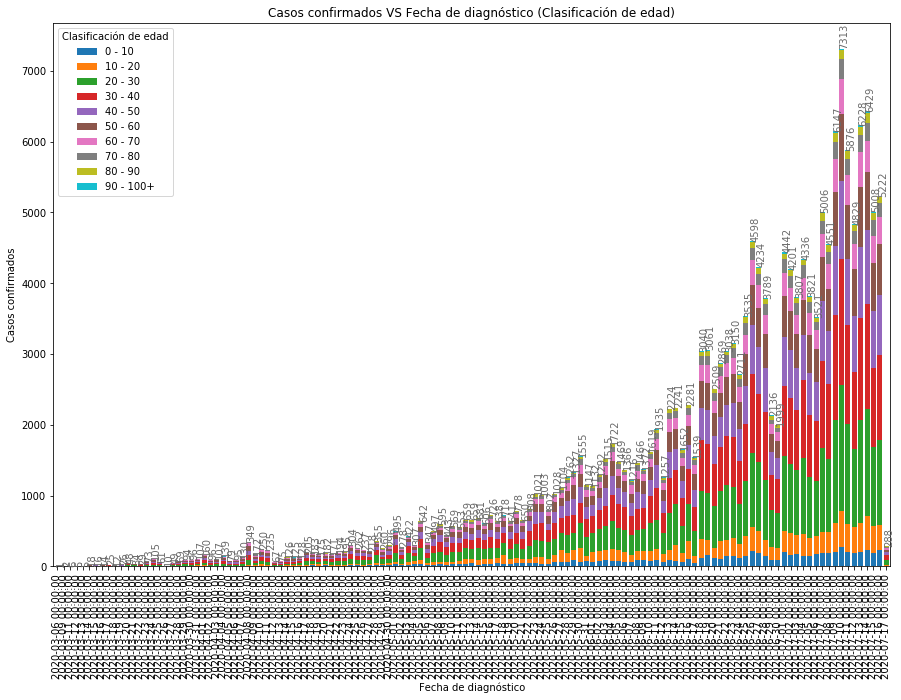

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci   N/a  \
Fecha de diagnóstico                                                    
2020-03-06               0.0        0.0       0.0           0.0   0.0   
2020-03-09               0.0        0.0       0.0           0.0   0.0   
2020-03-11               0.0        0.0       0.0           0.0   0.0   
2020-03-12               0.0        0.0       0.0           0.0   0.0   
2020-03-13               0.0        0.0       0.0           0.0   0.0   
...                      ...        ...       ...           ...   ...   
2020-07-13            5488.0      122.0     478.0          36.0  10.0   
2020-07-14            5771.0      129.0     443.0          42.0   6.0   
2020-07-15            4497.0       90.0     389.0          32.0   0.0   
2020-07-16            4740.0       19.0     436.0          27.0   0.0   
2020-07-17             265.0        0.0      18.0           5.0   0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-07-13                  94.0  
2020-07-14                  38.0  
2020-07-15                   0.0  
2020-07-16                   0.0  
2020-07-17                   0.0  

[131 rows x 6 columns]

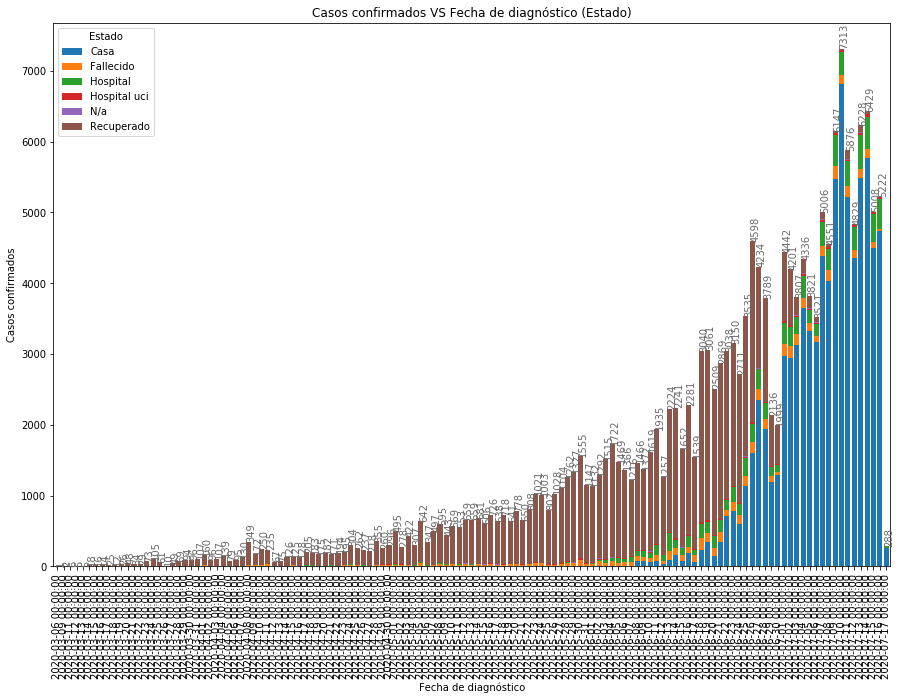

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                        F        M
Fecha de diagnóstico                  
2020-03-06                1.0      0.0
2020-03-09                2.0      1.0
2020-03-11                6.0      3.0
2020-03-12               11.0      3.0
2020-03-13               13.0      6.0
...                       ...      ...
2020-07-13            74548.0  86933.0
2020-07-14            77500.0  90410.0
2020-07-15            79878.0  93040.0
2020-07-16            82459.0  95681.0
2020-07-17            82589.0  95839.0

[131 rows x 2 columns]

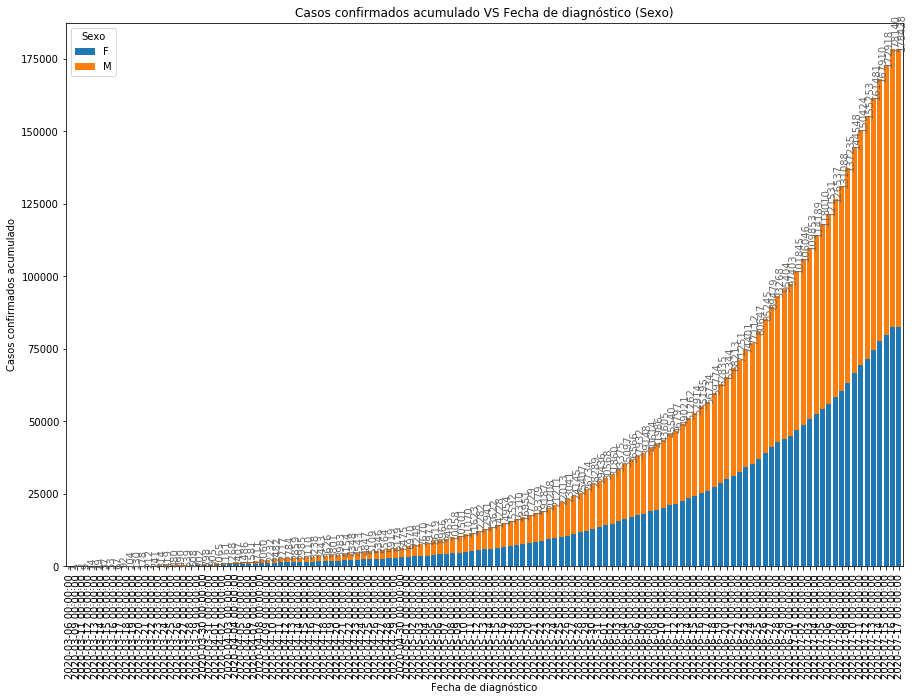

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-07-13               6974    12591    37397    36849    25000    20465   
2020-07-14               7209    13068    38910    38326    26052    21275   
2020-07-15               7400    13441    40038    39441    26850    21949   
2020-07-16               7637    13794    41233    40634    27699    22681   
2020-07-17               7646    13806    41303    40704    27740    22713   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-07-13               12000     6483     3128        594  
2020-07-14               12448     6726     3278        618  
2020-07-15               12836     6955     3375        633  
2020-07-16               13213     7147     3462        640  
2020-07-17               13243     7161     3472        640  

[131 rows x 10 columns]

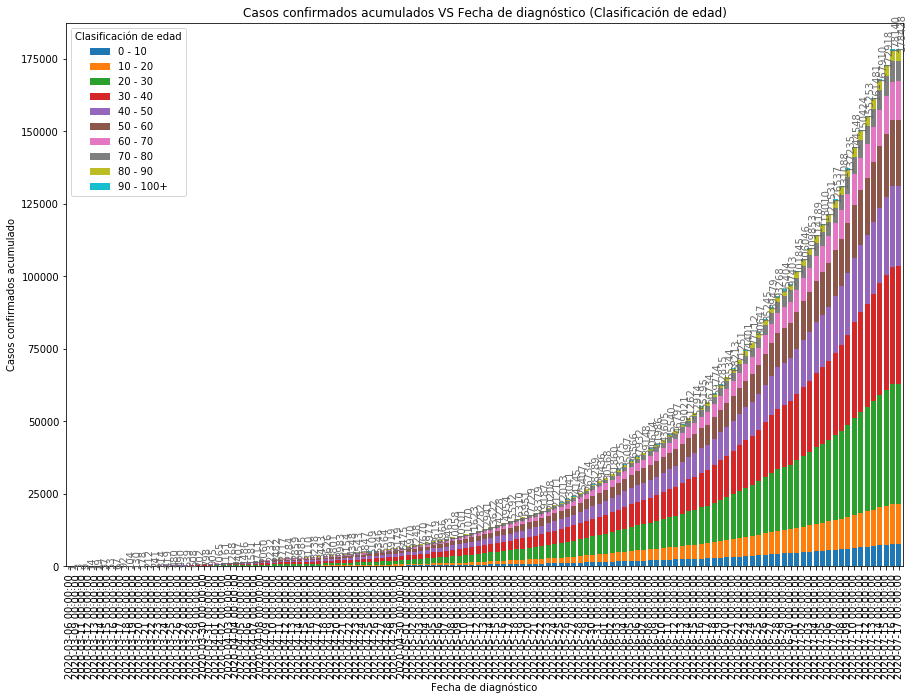

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                   Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                      
2020-03-06                0.0        0.0       0.0           0.0    0.0   
2020-03-09                0.0        0.0       0.0           0.0    0.0   
2020-03-11                0.0        0.0       0.0           0.0    0.0   
2020-03-12                0.0        0.0       0.0           0.0    0.0   
2020-03-13                0.0        0.0       0.0           0.0    0.0   
...                       ...        ...       ...           ...    ...   
2020-07-13            68525.0     5890.0    8089.0         895.0  356.0   
2020-07-14            74296.0     6019.0    8532.0         937.0  362.0   
2020-07-15            78793.0     6109.0    8921.0         969.0  362.0   
2020-07-16            83533.0     6128.0    9357.0         996.0  362.0   
2020-07-17            83798.0     6128.0    9375.0        1001.0  362.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-07-13               77726.0  
2020-07-14               77764.0  
2020-07-15               77764.0  
2020-07-16               77764.0  
2020-07-17               77764.0  

[131 rows x 6 columns]

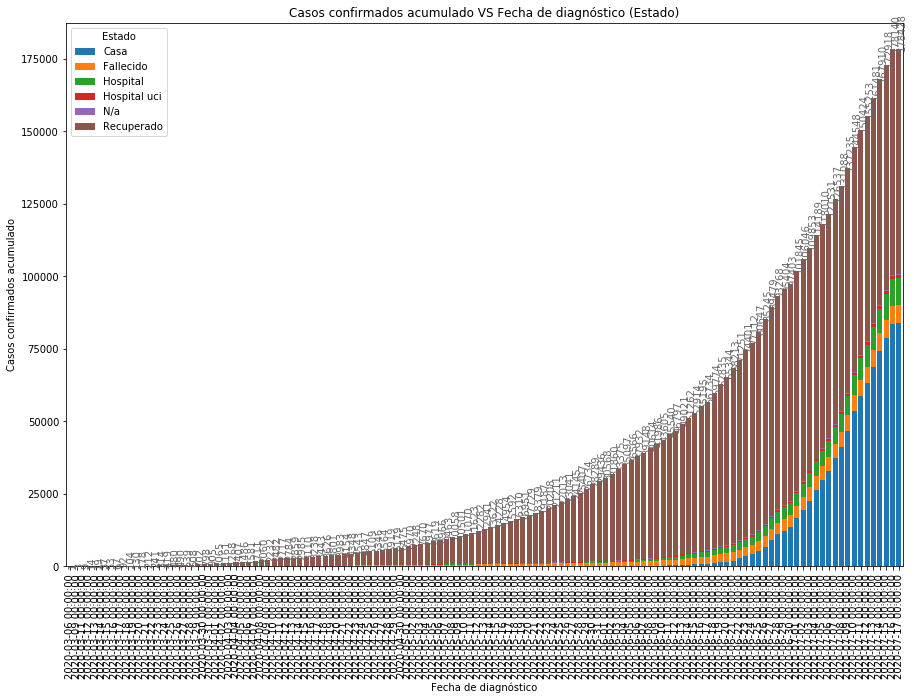

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>